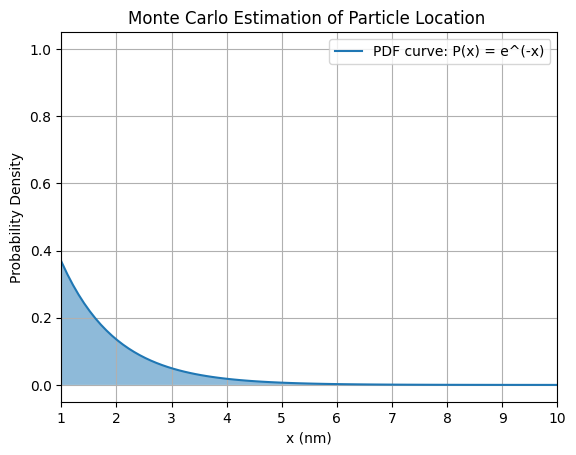

Monte Carlo Estimation:
Probability: 0.3677
Analytic Solution: 0.6321205588285577
Relative Error (%): 41.83071648841486


In [57]:
"""particle_location.ipynb"""

# Cell 1 - matplotlib and Monte Carlo estimation
# probability that a particle will be found in the region 𝑥≥1𝑛𝑚


import numpy as np
import matplotlib.pyplot as plt


# Define the PDF (Probability Density Function) 
def pdf(x):
    return np.exp(-x)


# Generate random samples
num_samples = 100000
samples = np.random.exponential(scale=1, size=num_samples)

# Estimate the probability using Monte Carlo simulation
count = np.sum(samples >= 1)
probability_estimation = count / num_samples

# Analytic solution
probability_analytic = 1 - np.exp(-1)

# Calculate the relative error
relative_error = (
    np.abs(probability_estimation - probability_analytic) / probability_analytic * 100
)

# Plot the PDF
x = np.linspace(0, 10, 100)
y = pdf(x)
plt.plot(x, y, label="PDF curve: P(x) = e^(-x)")
plt.fill_between(x, y, where=(x >= 1), alpha=0.5)  # start at 1

plt.xlabel("x (nm)")
plt.title("Monte Carlo Estimation of Particle Location ")
plt.ylabel("Probability Density")
plt.xlim(1, 10)
plt.legend()
plt.grid()


plt.show()  # Display the results
print("Monte Carlo Estimation:")
print(f"Probability: {probability_estimation}")
print(f"Analytic Solution: {probability_analytic}")
print(f"Relative Error (%): {relative_error}")


In [58]:
from scipy.integrate import quad


# Define the integrand function
def integrand(x):
    return np.exp(-x)


# Perform numerical integration using SciPy
probability_numerical, error = quad(integrand, 1, np.inf)

# Calculate the relative error
relative_error_numerical = (
    np.abs(probability_numerical - probability_analytic) / probability_analytic * 100
)

# Display the results
print("SciPy Integration:")
print(f"Probability: {probability_numerical}")
print(f"Analytic Solution: {probability_analytic}")
print(f"Relative Error (%): {relative_error_numerical}")

SciPy Integration:
Probability: 0.3678794411714423
Analytic Solution: 0.6321205588285577
Relative Error (%): 41.80232931306737


In [59]:
"""
A particle is described by the wave function 𝜓(𝑥):
𝜓(𝑥)={■8(0&𝑥<0@𝑐𝑒^(〖−𝑥〗∕𝐿)&𝑥≥0)┤
Given the normalization requirement:

∫_(−∞)^(+∞)▒〖|𝜓(𝑥)|^2 ⅆ𝑥〗=1
Find the constant 𝑐 where 𝐿=1 𝑛𝑚
"""

# cell 3 - find C where L = 1


import numpy as np
from scipy.integrate import quad


# Define the wave function 𝜓(𝑥)
def wave_function(x, c, L):
    if x < 0:
        return 0
    else:
        return c * np.exp(-x / L)


# Define the integrand function |𝜓(𝑥)|^2
def integrand(x, c, L):
    return np.abs(wave_function(x, c, L)) ** 2


# Set the values of L and the integration limits
L = 1  # in meters
a = -np.inf
b = np.inf

# Solve the integral equation to find the constant 𝑐
c, _ = quad(integrand, a, b, args=(1, L))

# Display the value of 𝑐
print(f"The constant 𝑐 is: {c}")

The constant 𝑐 is: 0.49999999999999994


Attributions:
OpenAI, communication, July 14, 2023
https://stackoverflow.com/questions/10046262/how-to-shade-region-under-the-curve-in-matplotlib
https://towardsdatascience.com/understanding-monte-carlo-simulation-eceb4c9cad4
https://en.wikipedia.org/wiki/Probability_density_function
